In [2]:
import pandas as pd
from nltk.stem.snowball import SnowballStemmer
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import numpy as np
#clean up data
#1.to lowercase and remove punctuation
#2.tokenization
#3.remove stop words: such as Prof. and names in bios

def noise_remove(text_list,stop_words): 
    stemmer = SnowballStemmer("english")
    final_text=[stemmer.stem(word) for word in text_list if not word in stop_words]
    final_text=' '.join([i for i in final_text if not i.isdigit()])
    return final_text


nltk.download('stopwords')
not_required=set(["dr","prof.","prof","dr.","phd"])

bios = pd.read_csv("bios.csv", usecols = ["Bio","Label","Year","Name"],dtype={'Bio':str,'Name':str})
n = bios.shape[0]

bios.Bio = bios.Bio.str.lower()
bios.Name = bios.Name.str.lower()

translator = str.maketrans('','',string.punctuation)
bios.Bio=bios.Bio.str.translate(translator)

stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))
stop_words=stop_words.union(not_required)

temp_list=[]
string_list=[]
gender_list=[]
temp_set=set()

for i in range(n):
    temp_set=temp_set.union(set(nltk.word_tokenize(bios.Name.loc[i])))
stop_words=stop_words.union(temp_set)
    
for i in range(n):
    #tokenizer = RegexpTokenizer(r'\D+') 
    #temp_x = nltk.word_tokenize(bios.Bio.loc[i])
    temp_list.append(nltk.word_tokenize(bios.Bio.loc[i]))
    string_list.append(noise_remove(temp_list[i],stop_words))
    if (bios.Label.loc[i] == 'F'):
        gender_list.append(2)
    else:
        gender_list.append(1)

   


[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#compute term frequency and document frequency
def term_frequency(text,uni_words):
    templ=text.split()
    frequency_each_bio=len(uni_words)*[0]
    for element in templ:
        if element in uni_words:
            frequency_each_bio[uni_words.index(element)]+=1
    return frequency_each_bio

def document_frequency(all_document_list,uni_words):
    temp =[]
    document_df = pd.DataFrame(columns = uni_words)
    for i in range(len(uni_words)):
        count=0
        for j in range(len(all_document_list)):
            if uni_words[i] in all_document_list[j].split():
                count += 1
        temp.append(count)
        
    document_df.loc[0]=temp
    return document_df
                    
uni_words=set()
for i in range(len(string_list)):
    uni_words=uni_words.union(set(string_list[i].split()))
    #print("^^^^^")

T_corpus=list(uni_words)
#print(len(uni_words))

term_df = pd.DataFrame(columns = T_corpus)
for i in range(len(string_list)):
    fre_list=term_frequency(string_list[i],T_corpus)
    term_df.loc[i]=fre_list

term_gender_df = term_df.copy(deep=True)
term_gender_df['male_or_female']=gender_list 

term_male_df=term_gender_df[term_gender_df['male_or_female']<2]
term_female_df=term_gender_df[term_gender_df['male_or_female']>1]
#print(term_female_df)
term_fre_male_df=term_male_df.sum(axis=0)
print("top 10 term frequency in male (male or female: represents number of male or female)")
print(term_fre_male_df.nlargest(10))
print("**********************") 
term_fre_female_df=term_female_df.sum(axis=0)
print("top 10 term frequency in female (male or female: represents number of male or female)")
print(term_fre_female_df.nlargest(10)/2)  #divide by 2 because value of each female=2
#print("#############################")
document_df=document_frequency(string_list,T_corpus)






top 10 term frequency in male (male or female: represents number of male or female)
comput            353.0
research          297.0
univers           278.0
scienc            242.0
male_or_female    153.0
professor         130.0
system            114.0
award             110.0
algorithm          98.0
work               93.0
dtype: float64
**********************
top 10 term frequency in female (male or female: represents number of male or female)
research          42.0
male_or_female    38.0
comput            35.5
scienc            33.0
univers           32.0
award             22.0
professor         21.0
engin             13.5
receiv            12.5
learn             12.0
dtype: float64


In [4]:

#compute tf-idf regard all documents as a whole
term_sum_df = term_df.copy(deep=True)
term_sum_df['length_of_document']=term_df.sum(axis=1)
tf_df=term_sum_df.copy(deep=True)
  
def calculate_idf(x):
    if x!=0:
        return np.log(1+n/x)
    
idf_df=document_df.applymap(calculate_idf)
#tf_idf_df=term_rate_df.mul(idf_df.loc[0])
idf_full_df=pd.concat([idf_df]*n,ignore_index=True)
for i in range(len(T_corpus)):
    term_sum_df[T_corpus[i]]=term_sum_df[T_corpus[i]]/term_sum_df['length_of_document']*idf_full_df[T_corpus[i]]


term_sum_df







,flink,httpssylvesterarnabcomfeaturedproject,pribina,govern,sensi,kensho,dna,stay,better,germani,...,write,rank,alberta,aachen,art,philosophi,gilmartin,technisch,land,length_of_document
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,105.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,95.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,75.0
5,0,0,0,0.0864403,0,0,0,0,0,0,...,0.0316265,0,0,0,0,0,0,0,0,116.0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,74.0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,124.0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53.0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,96.0


In [5]:
#compute tf-idf regard male and female different documents
def divide_male_female(df):
    term_male_df=df[df['male_or_female']<2]
    term_female_df=df[df['male_or_female']>1]
    return term_male_df,term_female_df
female_list=[]
male_list=[]
def calculate_male_idf(x):
    if x!=0:
        return np.log(1+152/x)
    else:
        return x
def calculate_female_idf(x):
    if x!=0:
        return np.log(1+38/x)
    else:
        return x
for i in range(len(string_list)):
    if gender_list[i]==2:
        female_list.append(string_list[i])
    else:
        male_list.append(string_list[i])
female_document_df=document_frequency(female_list,T_corpus)
male_document_df=document_frequency(male_list,T_corpus)
idf_female_df=female_document_df.applymap(calculate_female_idf)
idf_male_df=male_document_df.applymap(calculate_male_idf)
tf_df['male_or_female']=gender_list
tf_male_df,tf_female_df=divide_male_female(tf_df)

idf_male_full_df=pd.concat([idf_male_df]*153,ignore_index=True)
idf_female_full_df=pd.concat([idf_female_df]*38,ignore_index=True)
tf_male_df.index=range(153)
tf_female_df.index=range(38)
tf_idf_male_df = tf_male_df.copy(deep=True)
tf_idf_female_df=tf_female_df.copy(deep=True)
for i in range(len(T_corpus)):
    tf_idf_male_df[T_corpus[i]]=tf_male_df[T_corpus[i]]/tf_male_df['length_of_document']*idf_male_full_df[T_corpus[i]]
    tf_idf_female_df[T_corpus[i]]=tf_female_df[T_corpus[i]]/tf_female_df['length_of_document']*idf_female_full_df[T_corpus[i]]


In [6]:
tf_idf_male_df
tf_idf_female_df



,flink,httpssylvesterarnabcomfeaturedproject,pribina,govern,sensi,kensho,dna,stay,better,germani,...,rank,alberta,aachen,art,philosophi,gilmartin,technisch,land,length_of_document,male_or_female
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,105.0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,53.0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,96.0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0964095,0,0,0,76.0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,38.0,2
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,51.0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,67.0,2
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,55.0,2
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,218.0,2
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39.0,2


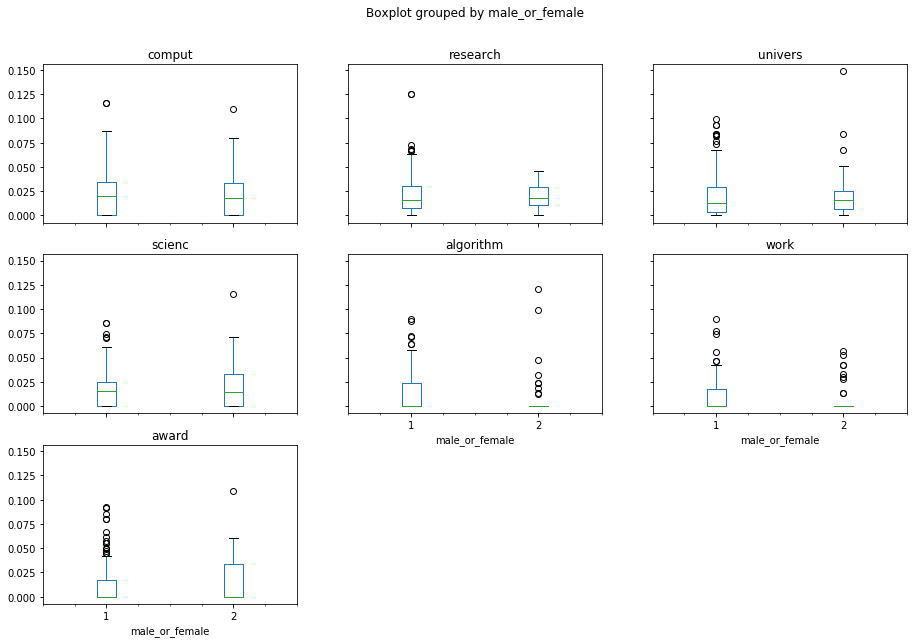

In [22]:
#tf-idf for different term in male and female
# 1 reprsents male   & 2 represnts female
frames=[tf_idf_male_df,tf_idf_female_df]
result = pd.concat(frames)
def plot_box(df,col):
    #bplot=sns.boxplot(y=col,x='male_or_female',data=df,width=0.5)
    #bplot=sns.boxplot(y=col,x='male_or_female',data=df,jitter=True,marker='o',alpha=0.5,color='black')
    df.boxplot(by='male_or_female',
               column=col,
               grid=False,
               figsize = [15,10])
    
col=['comput','research','univers','scienc','algorithm','work','award']
plot_box(result,col)

